<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/regression_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

# Загрузка набора данных

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


# Нормализация данных

Вычитаем среднее значение и делим на стандартное отклонение

In [3]:
# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

# Создаем сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации не используется.

Функция ошибки - среднеквадратичное отклонение.
Метрика - среднее абсолютное отклонение.

In [4]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Обучение сети

In [12]:
fit = model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2, validation_split = 0.2)

Epoch 1/100
323/323 - 1s - loss: 4.6016 - mae: 1.4769 - val_loss: 3.0035 - val_mae: 1.3993 - 906ms/epoch - 3ms/step
Epoch 2/100
323/323 - 1s - loss: 4.4087 - mae: 1.4666 - val_loss: 3.2597 - val_mae: 1.4252 - 568ms/epoch - 2ms/step
Epoch 3/100
323/323 - 1s - loss: 4.1657 - mae: 1.3958 - val_loss: 3.0480 - val_mae: 1.3357 - 571ms/epoch - 2ms/step
Epoch 4/100
323/323 - 1s - loss: 4.0287 - mae: 1.3950 - val_loss: 3.9654 - val_mae: 1.5678 - 542ms/epoch - 2ms/step
Epoch 5/100
323/323 - 1s - loss: 4.1783 - mae: 1.4283 - val_loss: 3.4157 - val_mae: 1.4576 - 567ms/epoch - 2ms/step
Epoch 6/100
323/323 - 1s - loss: 4.1322 - mae: 1.4058 - val_loss: 3.2799 - val_mae: 1.4385 - 544ms/epoch - 2ms/step
Epoch 7/100
323/323 - 1s - loss: 4.0869 - mae: 1.3926 - val_loss: 3.7638 - val_mae: 1.4975 - 588ms/epoch - 2ms/step
Epoch 8/100
323/323 - 1s - loss: 4.0597 - mae: 1.4260 - val_loss: 3.9298 - val_mae: 1.5968 - 600ms/epoch - 2ms/step
Epoch 9/100
323/323 - 1s - loss: 4.2080 - mae: 1.4112 - val_loss: 4.0157

# Оценка точности работы сети

In [6]:
mse, mae = model.evaluate(x_test, y_test, verbose=0)

In [7]:
print("Средняя абсолютная ошибка (тысяч долларов):", mae)

Средняя абсолютная ошибка (тысяч долларов): 2.5568416118621826


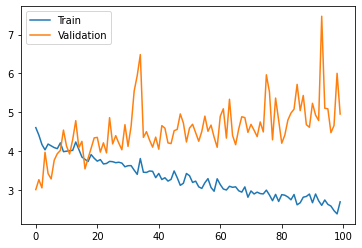

In [13]:
import matplotlib.pyplot as plt

plt.plot(fit.history['loss'], label = 'Train')
plt.plot(fit.history['val_loss'], label = 'Validation')
plt.legend()

# Использование сети для предсказания цен недвижимости

In [14]:
pred = model.predict(x_test)

In [15]:
print("Предсказанная стоимость:", pred[1][0], ", правильная стоимость:", y_test[1])

Предсказанная стоимость: 18.383497 , правильная стоимость: 18.8
